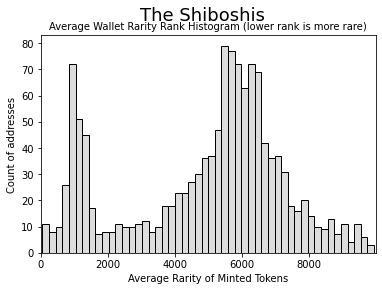

In [6]:
"""
@author: FlyingFish

"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

"""
Update Parameters Here
"""
FILE = "theshiboshis"
COLLECTION_NAME = "The Shiboshis" # For the graph title
TOKEN_COL = 'TOKEN_ID'

PATH = "../minting_data/{}_minting.csv".format(FILE)
RARITY_DB = pd.read_csv(PATH)
RARITY_DB = RARITY_DB[RARITY_DB['TOKEN_ID'].duplicated() == False]

LOWER_BOUND = 0
UPPER_BOUND = max(RARITY_DB['TOKEN_ID'])    

"""
Helper Functions
"""
def print_graph(RARITY_DB):
    if TOKEN_COL == 'TOKEN_NAME':
        RARITY_DB['TOKEN_ID'] = RARITY_DB['TOKEN_NAME'].str.split('#').str[1].astype(int)
    
    RARITY_DB['tokensMinted'] = 1
    RARITY_HIST = RARITY_DB.groupby(['to_account']).sum()
    RARITY_HIST['avgRank'] = RARITY_HIST['rank'] / RARITY_HIST['tokensMinted']

    ax = RARITY_HIST['avgRank'].plot.hist(bins = 50,  color = "gainsboro", ec="black")

    plt.suptitle(COLLECTION_NAME, fontsize=18)
    plt.title("Average Wallet Rarity Rank Histogram (lower rank is more rare)", fontsize=10)
    ax.set_xlabel("Average Rarity of Minted Tokens")
    ax.set_ylabel("Count of addresses")
    plt.xlim(LOWER_BOUND, UPPER_BOUND)
    
print_graph(RARITY_DB)